In [ ]:
import glob
import os
import pickle
from scipy.stats import bernoulli

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.metrics import mean_squared_error as MSE
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import rc
from xgboost import XGBRegressor

import xgboost as xgb
!pip install scikit-plot
import scikitplot as skplt
import scipy.stats as st

from google.colab import drive
# mount google drive information in a google colaboratory directory
drive.mount('/content/gdrive')

path = r'gdrive/MyDrive/tesis_maestria/Notebooks/' # path
# path = 'home\Documents\Personal\MIMYANALYTICS\TESIS\TESIS\datasets' #C:\Users\dlongas

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(path+"df_tercer_modelo.csv")
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head()

fem  OS_Android  OS_Linux  ...  ypf  zonajobs  zonaprop
0  1.0           1         0  ...  0.0       0.0       0.0
1  0.0           1         0  ...  0.0       0.0       0.0
2  0.0           1         0  ...  0.0       0.0       0.0
3  0.0           1         0  ...  0.0       0.0       0.0
4  0.0           0         0  ...  0.0       4.0       0.0

[5 rows x 72 columns]

In [ ]:
variables_dep_final = ['OS_Android',
 'OS_Linux',
  'navegador_Firefox',
 'navegador_SocialApp',
 'modelo_Samsung SM-A105M',
 'modelo_Samsung SM-A205G',
 'modelo_Samsung SM-A307G',
 'modelo_Samsung SM-A505G',
 'modelo_Samsung SM-A515F',
 'modelo_Samsung SM-J400M',
 'modelo_Samsung SM-J600G',
 'modelo_Samsung SM-J610G',
 'modelo_Samsung SM-J700M',
 'modelo_XiaoMi Redmi Note 7',
 'modelo_moto e5',
 'VOS_Windows 10',
 'VOS_Windows 7',
 'VOS_Windows 8',
 'marca_Samsung',
 'marca_XiaoMi',
 'domain_type_Alimentos',
 'domain_type_Busqueda_Laboral',
 'domain_type_Consumo',
 'domain_type_Deportes',
 'domain_type_Familia_y_Hogar',
 'domain_type_Farandula',
 'domain_type_Inmobiliaria',
 'domain_type_Linea_Movil',
 'domain_type_Noticias',
 'domain_type_Otros',
 'domain_type_Viajes',
 '0221',
 'Otros',
 'almundo',
 'ambito',
 'animeflv',
 'ausa',
 'autocosmos',
 'buenosaires',
 'bumeran',
 'contextotucuman',
 'credisense',
 'creditosparatodos',
 'cronista',
 'curriculumvitaeempresarial',
 'depor',
 'disco',
 'elcomercio',
 'empleosit',
 'futbollibre',
 'gardenlife',
 'gba',
 'infotechnology',
 'jumbo',
 'losandes',
 'movistar',
 'mundoazulgrana',
 'nissan',
 'prestamosparatodos',
 'pronto',
 'ratingcero',
 'renault',
 'rojadirectatv',
 'sancorsalud',
 'starbucksrewards',
 'swarovski',
 'toyota',
 'veadigital',
 'ypf',
 'zonajobs',
 'zonaprop']
# get the dependent and the independents variables
X=df[variables_dep_final]
y = df['fem']



*   **Train**: subconjunto para entrenar el modelo.
*   **Test**: subconjunto para verificar que el modelo reproduce los resultados deseados



In [ ]:
# get train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,test_size =0.2)

In [ ]:
#data standarization
scaler = StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

Ejecuto el modelo final XGBoost para ver importancia de variables, mas allá de lo que ofrecen RF y XGBoost per sé.

In [ ]:
# model_xgb = xgb.XGBClassifier(n_jobs=-1)

# one_to_left = st.beta(10, 1) #  This distribution will return values between 0 and 1, nearer to 1 #WARNING, NO TENGO CLASES DESB

# max_depth = list(range(3,12))
# max_depth.append(None)

# hyperparameters = {  
#     "n_estimators": st.randint(50,200), # Number of boosted trees to fit.
#     "max_depth": max_depth,     # Maximum tree depth for base learners.
#     "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
#     "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
#     "subsample": one_to_left,     # Subsample ratio of the training instance.
#     "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
#     'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
#     "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
# }

# xgb_best_model = RandomizedSearchCV(estimator = model_xgb, 
#                             param_distributions = hyperparameters,
#                             scoring='accuracy', #check
#                             n_iter = 50, cv = 3, verbose=4, 
#                             random_state=42, n_jobs = -1)
# xgb_best_model.fit(Xtrain, ytrain)

# ypred = xgb_best_model.predict(Xtest) 
# yproba = xgb_best_model.predict_proba(Xtest)[:,1]

# best_params=xgb_best_model.best_params_
# best_params

In [ ]:
xgboost = xgb.XGBClassifier(n_jobs=-1,
                            colsample_bytree = 0.998326726997658,
                            gamma= 5.12093058299281,
                            learning_rate=  0.14059831007917517,
                            max_depth = 9,
                            min_child_weight= 4.487328580099829,
                            n_estimators= 177,
                            reg_alpha= 5.227513505274801,
                            subsample= 0.8790530564632983)

xgboost.fit(Xtrain, ytrain)


ypred = xgboost.predict(Xtest)
yproba = xgboost.predict_proba(Xtest)[:,1]

**FI desde XGBoost, type='gain'**

Text(0.5, 0, 'Xgboost Feature Importance')

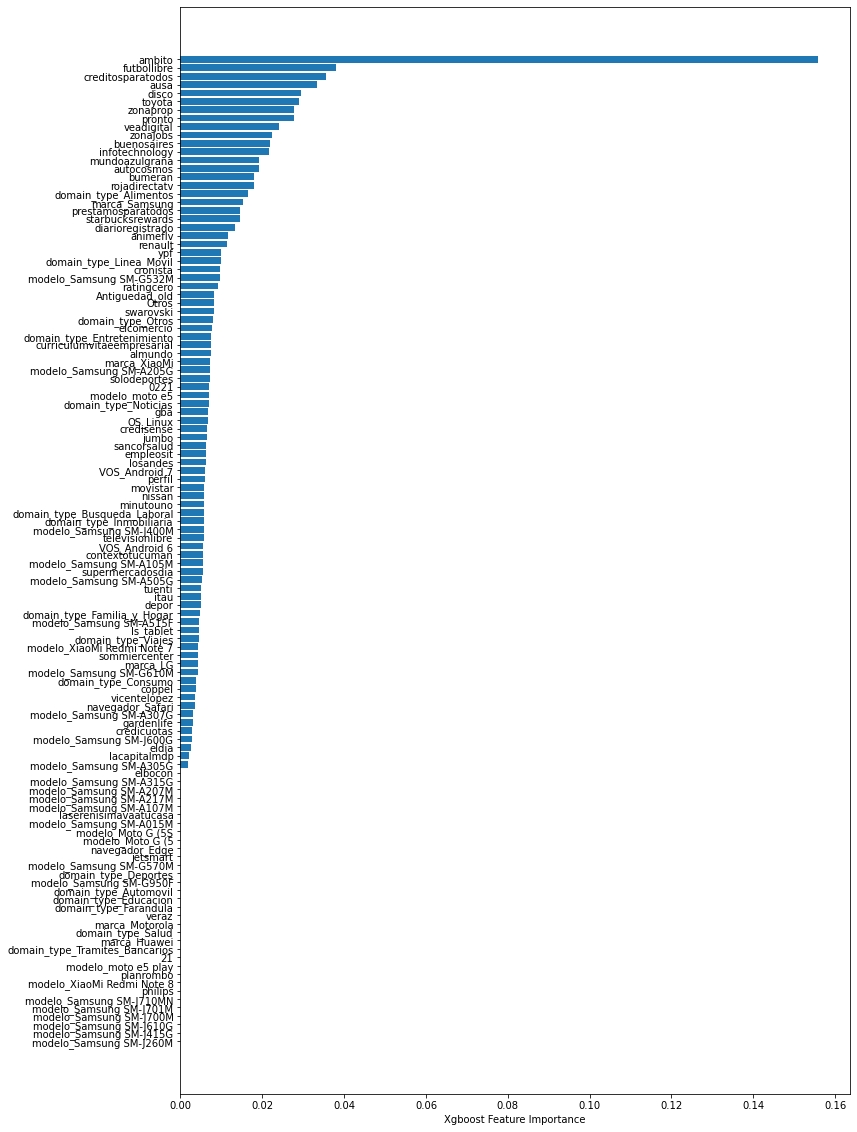

In [ ]:
sorted_idx = xgboost.feature_importances_.argsort()
plt.rcParams["figure.figsize"] = (12,20)
plt.barh(X.columns[sorted_idx], xgboost.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

## **Global feature importance and effect**
Las siguientes medidas son para entender la relación global entre features y target en el modelo.

### Permutation Importance

In [ ]:
!pip install eli5
import eli5 #es necesario eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 35.7MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# get train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,test_size =0.2)
#No escalamos variables
xgboost = xgb.XGBClassifier(n_jobs=-1,
                            colsample_bytree = 0.998326726997658,
                            gamma= 5.12093058299281,
                            learning_rate=  0.14059831007917517,
                            max_depth = 9,
                            min_child_weight= 4.487328580099829,
                            n_estimators= 177,
                            reg_alpha= 5.227513505274801,
                            subsample= 0.879053056463298)

xgboost.fit(Xtrain, ytrain)


y_pred = xgboost.predict(Xtest)
y_proba = xgboost.predict_proba(Xtest)[:,1]

In [ ]:
#Antes se debió correr XGBoost sin escalar variables
#split en train y test 
import sklearn.model_selection
train_X, val_X, train_y, val_y= sklearn.model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20)

In [ ]:
perm = PermutationImportance(xgboost, random_state=1).fit(val_X, val_y) #estos datos no son de entrenamiento, son distintos
#comparo las predicc del mod entrenado sin ninguna fila permutada versus las predicciones del modelo con filas permutadas
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

### Mean decrease in impurity

In [ ]:
feature_importances = pd.DataFrame(xgboost.feature_importances_, #contexto de ensamble deárboles
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(15)

importance
ambito                   0.127528
navegador_Firefox        0.080676
futbollibre              0.045891
toyota                   0.039482
ausa                     0.038778
creditosparatodos        0.036903
infotechnology           0.032035
zonaprop                 0.031320
pronto                   0.031178
disco                    0.028383
veadigital               0.023751
domain_type_Alimentos    0.022684
zonajobs                 0.021982
OS_Android               0.021907
buenosaires              0.020390

## **Importancia local (local surrogate models)**

### LIME

In [ ]:
from sklearn.datasets import load_boston
import sklearn.ensemble
import sklearn.linear_model
import sklearn.model_selection
import numpy as np
from sklearn.metrics import r2_score

!pip install lime

import lime
import lime.lime_tabular

     |████████████████████████████████| 276kB 31.0MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=b6f4288bdd3e25bd5f47cadbf5c5f8b404bb5bf47789e739760430f4a2e3c174
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
categorical_features_nosotros  = np.argwhere(np.array([len(set(X.to_numpy()[:,x])) for x in range(X.shape[1])]) <= 10).flatten()
categorical_features_nosotros

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 34, 41, 42,
       44, 47, 58])

In [ ]:
len(X.columns) #118 COLUMNAS, ES DECIR, 118 VARIABLES INDEPENDIENTES TIENE NUESTRO CASO DE ESTUDIO

71

In [ ]:
len(categorical_features_nosotros) #67 VARIABLES CATEGÓRICAS (ojo, que significa el "<= 10)")

37

In [ ]:
len(Xtrain) #70.304 OBSERVCIONES EN CONJUNTO TRAIN

70304

In [ ]:
len(df.columns.to_numpy()) #119 COLUMNAS TIENE EL DATAFRAME ORIGINAL

72

In [ ]:
# Acá si estandarizo las variables
#data standarization
scaler = StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [ ]:
# generate an "explainer" object - ESTO SI REQUIERE VARIABLES ESCALADAS -
categorical_features  = np.argwhere(np.array([len(set(X.to_numpy()[:,x])) for x in range(X.shape[1])]) <= 10).flatten()
explainer = lime.lime_tabular.LimeTabularExplainer(Xtrain, feature_names=X.columns.to_numpy(), class_names=['y'], categorical_features=categorical_features, verbose=False, mode='regression',discretize_continuous=False)

In [ ]:
#POR LO TANTO, SE VUELVE A CORRER XGBOOST CON VARIABLES ESCALADAS
# get train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,test_size =0.2)
#data standarization
scaler = StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)
xgboost = xgb.XGBClassifier(n_jobs=-1,
                            colsample_bytree = 0.998326726997658,
                            gamma= 5.12093058299281,
                            learning_rate=  0.14059831007917517,
                            max_depth = 9,
                            min_child_weight= 4.487328580099829,
                            n_estimators= 177,
                            reg_alpha= 5.227513505274801,
                            subsample= 0.879053056463298)

xgboost.fit(Xtrain, ytrain)


y_pred = xgboost.predict(Xtest)
y_proba = xgboost.predict_proba(Xtest)[:,1]

In [ ]:
import warnings
from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, Xtrain, xgboost.predict, sample_size=20, num_features=14, num_exps_desired=5)

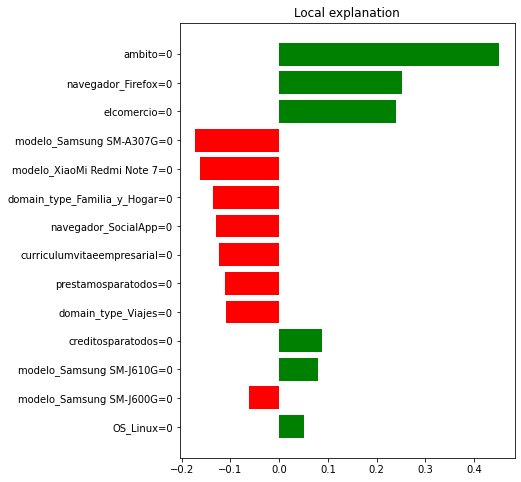

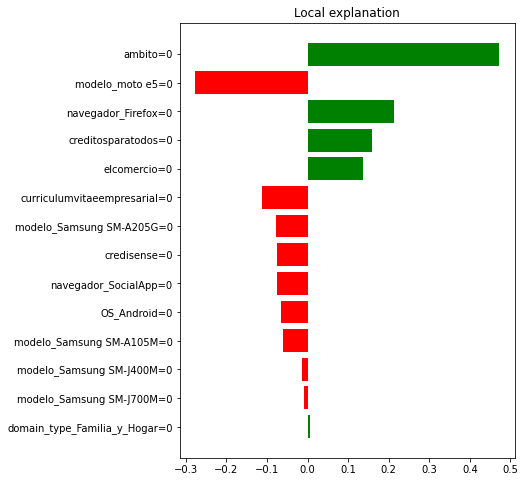

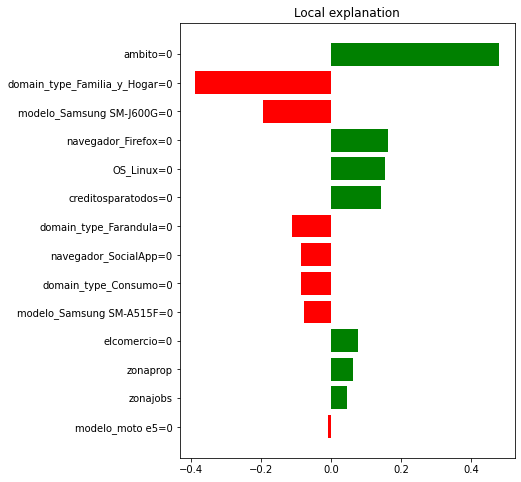

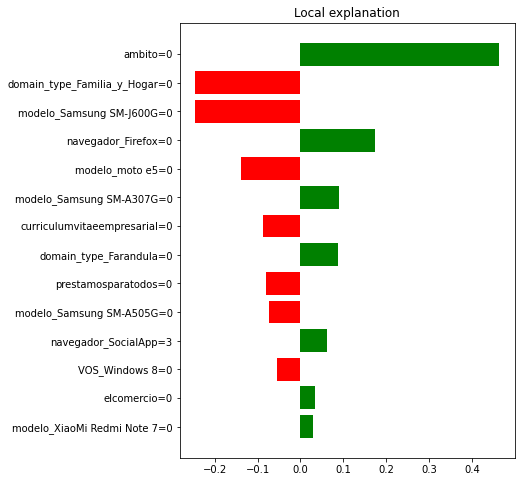

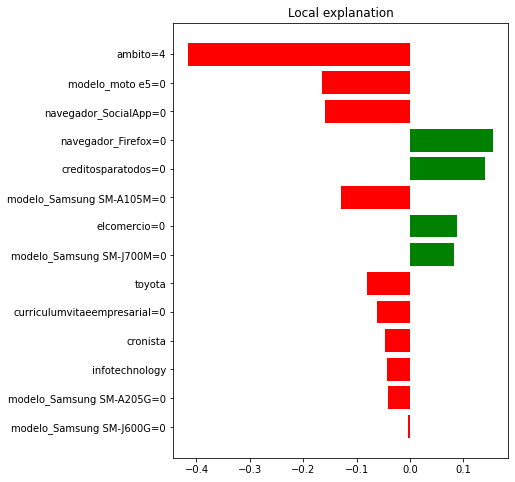

In [ ]:
plt.rcParams["figure.figsize"] = (6, 8)
[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations];

In [ ]:
#generate an explanation
i = 25 #QUE SIGNIFICABA ESTO¿¿¿???
exp = explainer.explain_instance(Xtest[i], xgboost.predict, num_features=40) #ojo cambiar estos valores #118

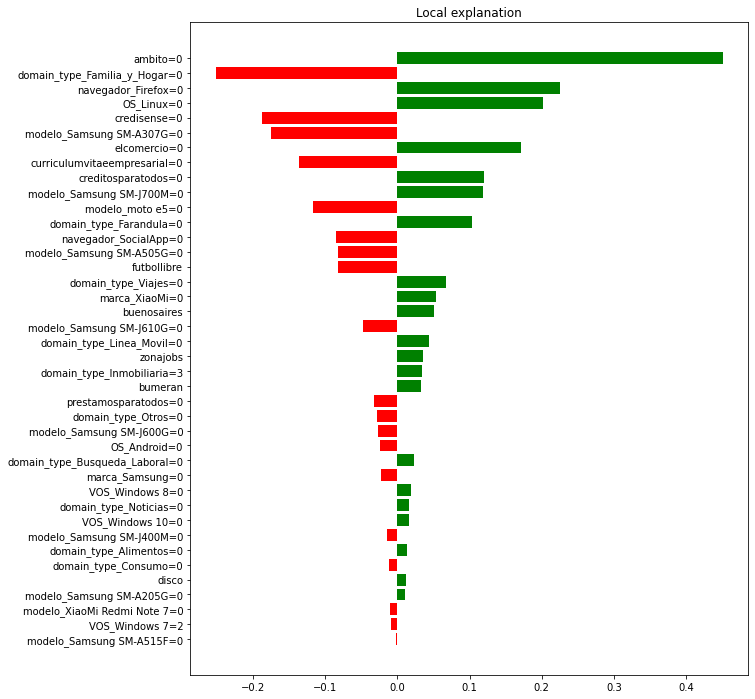

In [ ]:
plt.rcParams["figure.figsize"] = (10, 12)
expo = exp.as_pyplot_figure();

### SHAPE

### *Individual Force Plot*

In [ ]:
!pip install shap
import shap  

     |████████████████████████████████| 358kB 34.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491620 sha256=37f2ecda3b0e7a2093926e9d93b6d7c331a8b4b4a84f3c233ec03bf38f3ced75
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
train_X, val_X, train_y, val_y= sklearn.model_selection.train_test_split(X, y, random_state=0,test_size =0.2)
# #data standarization
# scaler = StandardScaler()
# Xtrain=scaler.fit_transform(Xtrain)
# Xtest=scaler.transform(Xtest)
xgboost = xgb.XGBClassifier(n_jobs=-1,
                            colsample_bytree = 0.998326726997658,
                            gamma= 5.12093058299281,
                            learning_rate=  0.14059831007917517,
                            max_depth = 9,
                            min_child_weight= 4.487328580099829,
                            n_estimators= 177,
                            reg_alpha= 5.227513505274801,
                            subsample= 0.879053056463298)
#2 y 3. Instaciamos la clase y fiteamos 
my_model = xgboost.fit(train_X.to_numpy(), train_y.to_numpy())

In [ ]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_model.predict(data_for_prediction_array)

array([1.])

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction)

In [ ]:
row_to_show = 500
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_model.predict(data_for_prediction_array)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction)

In [ ]:
row_to_show = 11000
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_model.predict(data_for_prediction_array)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction)

In [ ]:
row_to_show = 35
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_model.predict(data_for_prediction_array)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)
# Reduce the size of data from original training data to estimate Shape values 
#X_train_summary = shap.kmeans(X_train, 10)

model = xgb.XGBClassifier(n_jobs=-1,
                            colsample_bytree = 0.998326726997658,
                            gamma= 5.12093058299281,
                            learning_rate=  0.14059831007917517,
                            max_depth = 9,
                            min_child_weight= 4.487328580099829,
                            n_estimators= 177,
                            reg_alpha= 5.227513505274801,
                            subsample= 0.879053056463298)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

tree_explainer = shap.TreeExplainer(model)
shap_values = tree_explainer.shap_values(X)

shap.initjs()
shap.force_plot(tree_explainer.expected_value, shap_values[10,:], X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(tree_explainer.expected_value, shap_values[500,:], X_test.iloc[15,:]) #epica!!

In [ ]:
shap.initjs()
shap.force_plot(tree_explainer.expected_value, shap_values[6500,:], X_test.iloc[0,:]) #epica!!

In [ ]:
shap.initjs()
shap.force_plot(tree_explainer.expected_value, shap_values[5620,:], X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap.force_plot(tree_explainer.expected_value, shap_values[25,:], X_test.iloc[0,:])

### *Summary Plot*

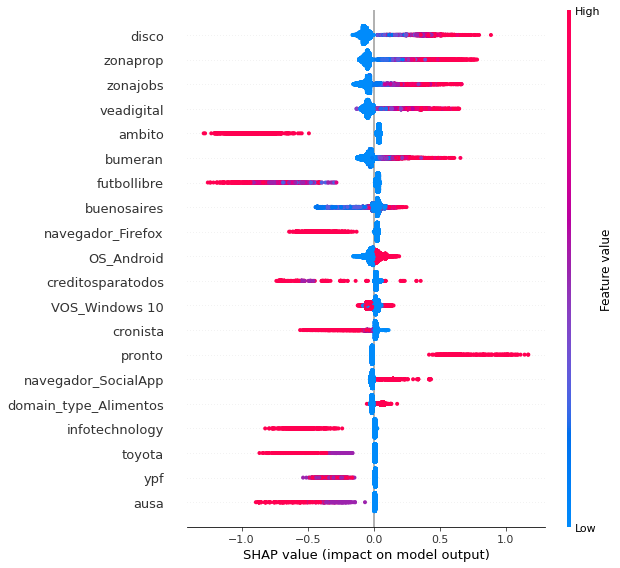

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, val_X)

En este gráfico, cada punto tiene tres características:

*  La ubicación vertical muestra qué característica está representando
*  El color muestra si esa característica era alta o baja para esa fila del conjunto de datos
*  La ubicación horizontal muestra si el efecto de ese valor causó una prediccion mayor o menor

### *Feature dependence plot*

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

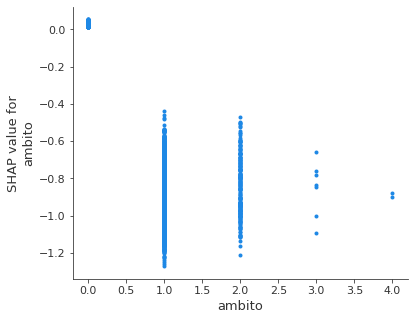

In [ ]:
# make plot.
shap.dependence_plot('ambito', shap_values, X, interaction_index=None) 

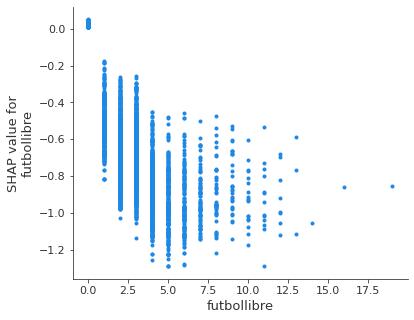

In [ ]:
# make plot.
shap.dependence_plot('futbollibre', shap_values, X, interaction_index=None) 

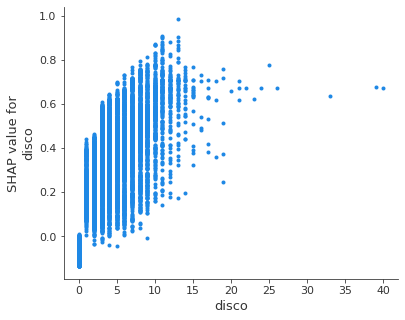

In [ ]:
# make plot.
shap.dependence_plot('disco', shap_values, X, interaction_index=None) 

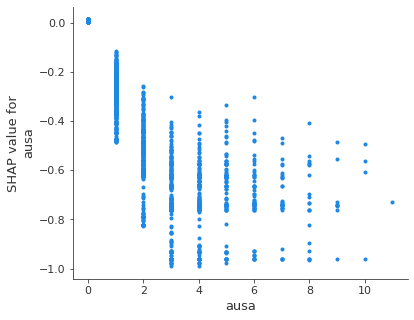

In [ ]:
# make plot.
shap.dependence_plot('ausa', shap_values, X, interaction_index=None) 

### *Interaction values plot*

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

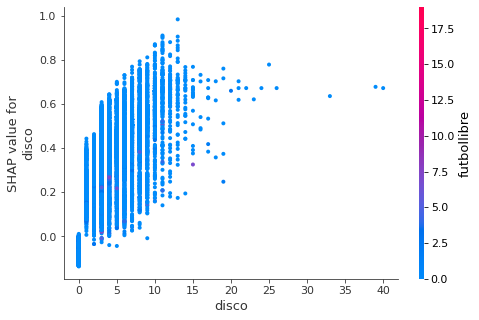

In [ ]:
# make plot.
shap.dependence_plot('disco', shap_values, X, interaction_index="futbollibre") 

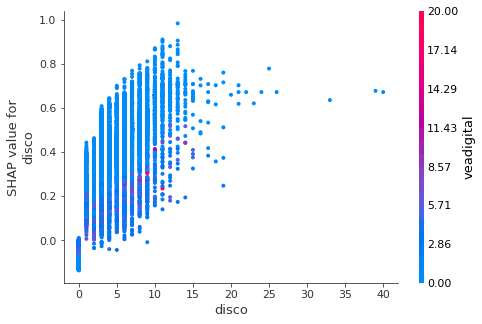

In [ ]:
# make plot.
shap.dependence_plot('disco', shap_values, X, interaction_index="veadigital") 

### *Collective force plot*

In [ ]:
#en colab es necesario el shap.initjs()antes de cada visualización
import shap
shap.initjs()
# use Kernel SHAP to explain test set predictions. Utilizamos un sample de 50 observaciones, en principio
train_X_2=shap.utils.sample(train_X, nsamples=50, random_state=0)
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X_2)

In [ ]:
len(val_X_2)

NameError: ignored

In [ ]:
#web clave: https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
shap.initjs()
# use Kernel SHAP to explain test set predictions. Utilizamos un sample de 100 observaciones, en principio
train_X_2=shap.utils.sample(train_X, nsamples=100, random_state=0)
val_X_2=shap.utils.sample(val_X, nsamples=100, random_state=0)

# The SHAP values
k_explainer = shap.KernelExplainer(my_model.predict,val_X_2)
k_shap_values = k_explainer.shap_values(val_X_2)

shap.initjs()
shap.force_plot(k_explainer.expected_value, k_shap_values, val_X_2)

### *FAIRML*

In [ ]:
pip install https://github.com/adebayoj/fairml/archive/master.zip


     | 8.5MB 3.4MB/s
  Created wheel for fairml: filename=fairml-0.1.1.5-cp37-none-any.whl size=9439 sha256=ff32a05199ac9f26e0083e6f054540a942bfc59b7529db1fa7cdfa82e86eb1b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-1uhouycz/wheels/f2/31/c0/4f89bb5d32942468c61f33ae1f59386c516e2318d033956a5c
Successfully built fairml


In [ ]:
from fairml import audit_model
importances, _ = audit_model(xgboost.predict, X)

print(importances)

Feature: Is_tablet,	 Importance: 0.0006599833866250953
Feature: OS_Linux,	 Importance: -0.0010810072711962767
Feature: navegador_Edge,	 Importance: 0.0003413707172198769
Feature: navegador_Safari,	 Importance: 0.0017978857773580182
Feature: modelo_Moto G (5,	 Importance: 0.0005917092431811199
Feature: modelo_Moto G (5S,	 Importance: 0.0006372253388104368
Feature: modelo_Samsung SM-A015M,	 Importance: 0.0002617175498685723
Feature: modelo_Samsung SM-A105M,	 Importance: 0.0021620145423925535
Feature: modelo_Samsung SM-A107M,	 Importance: 0.0005575721714591323
Feature: modelo_Samsung SM-A205G,	 Importance: 0.001194797510269569
Feature: modelo_Samsung SM-A207M,	 Importance: 0.0004892980280151568
Feature: modelo_Samsung SM-A217M,	 Importance: 0.0005006770519224861
Feature: modelo_Samsung SM-A305G,	 Importance: 0.0009558380082156552
Feature: modelo_Samsung SM-A307G,	 Importance: 0.0010696282472889476
Feature: modelo_Samsung SM-A315G,	 Importance: 0.0006258463149031076
Feature: modelo_Samsung

In [ ]:
total, _ = audit_model(xgboost.predict, X)

In [ ]:
from fairml import plot_dependencies

plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence",
    fig_size=(13,10)
)

ModuleNotFoundError: ignored